In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from scipy.ndimage import gaussian_filter1d

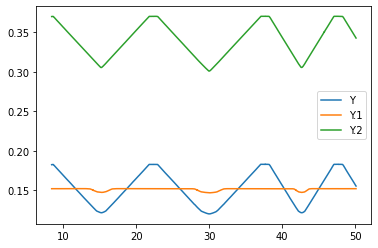

In [3]:
df = pd.read_csv('../paper_data/rigid/rigid.csv', skiprows = 6,usecols=[1,3,5,6,9])
# df['diff_ur_fin'] = df['Y']-df['Y.1']
# df['diff_ur_fin_filtered'] = gaussian_filter1d(df['diff_ur_fin'], sigma=2, truncate=4)

# Y.2 UR5 ; Y.1 piano key; Y fingertip 
sigma = 8
truncate = 4
diff = df.diff()
diff['V_Y'] = gaussian_filter1d(diff['Y'] / diff['Time'], sigma=sigma, truncate=truncate)
diff['V_Y.1'] = gaussian_filter1d(diff['Y.1'] / diff['Time'], sigma=sigma, truncate=truncate)
diff['V_Y.2'] = gaussian_filter1d(diff['Y.2'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_ur_fin_relative'] = gaussian_filter1d(diff['diff_ur_fin_filtered'] / diff['Time'], sigma=sigma, truncate=truncate)

# on_key = []
# for rel_vel,rel_disp in zip(diff['V_ur_fin_relative'],df['diff_ur_fin']):
#     # on_key.append(rel_disp<rel_diff_threshold and abs(rel_vel)>rel_vel_threshold)
#     on_key.append(float(abs(rel_vel) > rel_vel_threshold))

# on_key = gaussian_filter1d(on_key, sigma=1, truncate=6)
# on_key = [0.01*int(x!=0) for x in on_key]

start = 0
end = 5000
plt.plot(df['Time'][start:end], df['Y'][start:end], label='Y')
plt.plot(df['Time'][start:end], df['Y.1'][start:end], label='Y.1')
plt.plot(df['Time'][start:end], df['Y.2'][start:end], label='Y.2')
# plt.plot(df['Time'][start:end], on_key[start:end])
# plt.plot(df['Time'][start:end], df['diff_ur_fin_filtered'][start:end])
# plt.plot(df['Time'][start:end], df['Y.1'][start:end])
# plt.plot(df['Time'][start:end], df['Y'][start:end])
# plt.plot(df['Time'][start:end], df['Y.1'][start:end])
# plt.plot(df['Time'][start:end], df['Y.2'][start:end])
# plt.plot(df['Time'], diff['V_ur_fin_relative'])
# plt.plot(df['Time'], on_key)
plt.legend()
plt.show()

Text(0, 0.5, 'velocity(m/s)')

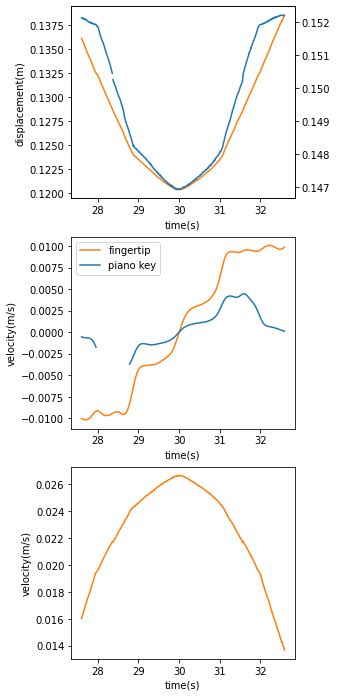

In [4]:
sigma = 12
truncate = 4

diff = df.diff()
diff['V_Y'] = gaussian_filter1d(diff['Y'] / diff['Time'], sigma=sigma, truncate=truncate)
diff['V_Y.1'] = gaussian_filter1d(diff['Y.1'] / diff['Time'], sigma=sigma, truncate=truncate)
diff['V_Y.2'] = gaussian_filter1d(diff['Y.2'] / diff['Time'], sigma=sigma, truncate=truncate)

start = 2300
end = 2900
fig,(ax0,ax2,ax3) = plt.subplots(3,1,figsize=(4,12))
ax0.plot(df['Time'][start:end], df['Y'][start:end], label = 'fingertip', color = 'tab:orange')
ax0.set_xlabel('time(s)') 
ax0.set_ylabel('displacement(m)') 
ax1 = ax0.twinx() 
ax1.plot(df['Time'][start:end], df['Y.1'][start:end], label = 'piano key', color = 'tab:blue')
# ax0.legend()

ax2.plot(df['Time'][start:end], diff['V_Y'][start:end], label = 'fingertip', color = 'tab:orange')
ax2.plot(df['Time'][start:end], diff['V_Y.1'][start:end], label = 'piano key', color = 'tab:blue')
ax2.legend()
ax2.set_xlabel('time(s)') 
ax2.set_ylabel('velocity(m/s)') 

ax3.plot(df['Time'][start:end], df['Y.1'][start:end]-df['Y'][start:end], label = 'fingertip', color = 'tab:orange')
# ax2.plot(df['Time'][start:end], diff['V_Y.1'][start:end], label = 'piano key', color = 'tab:blue')
ax3.set_xlabel('time(s)') 
ax3.set_ylabel('velocity(m/s)') 
# Y.2 UR5 ; Y.1 piano key; Y fingertip 